In [8]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib as mlt
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
batch_size = 256
lr = 0.0002
epochs = 10
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # nvidia-smi 명령어로 gpu 확인 가능 / cuda 뒤의 번호 바꿀수 있다.

In [3]:
mnist_train = datasets.MNIST('./', train=True , transform = transforms.ToTensor(), download = True)
mnist_test = datasets.MNIST('./', train=False , transform = transforms.ToTensor(), download = True) 

train_loader = DataLoader(mnist_train, batch_size=batch_size , shuffle = True , num_workers = 2 , drop_last = True)
test_loader = DataLoader(mnist_test, batch_size=batch_size , shuffle = False , num_workers = 2 , drop_last = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
print(len(mnist_train))
print(len(mnist_test))
print(len(train_loader))

60000
10000
234


In [ ]:
mnist_train[0][0].size()

torch.Size([1, 28, 28])

In [4]:
class cnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(1,16,5), # 16*24*24
            nn.ReLU(),
            nn.Conv2d(16,32,5), # 32*20*20
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 32*10*110
            nn.Conv2d(32,64,5), # 64*6*6
            nn.ReLU(),
            nn.MaxPool2d(2,2) # 64*3*3
        )
            
        self.fc_layer = nn.Sequential(
            nn.Linear(64*3*3,100),
            nn.ReLU(),
            nn.Linear(100,10)
        )
        
    def forward(self, x):
        out = self.layer(x)
        out = out.view(batch_size, -1) # 전체가 batch_size*64*3*3 일테니까 한 행에 하나의 데이터가 들어갈수 있게 나누기???
        out = self.fc_layer(out)
        return out

cnn = cnn()
cnn      

cnn(
  (layer): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=576, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [5]:
model = cnn.to(device)
loss_fun = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr)

In [6]:
loss_arr=[]
loss_arr2=[]
loss_sum=0
for epoch in range(epochs):
    for i, data in enumerate(train_loader):
        image, label = data[0],data[1]
        image = image.to(device)
        label = label.to(device)
        
        optimizer.zero_grad()
        output = model(image)
        loss = loss_fun(output,label) # loss function 의 이름을 loss로 할 경우 한번하고 오류발생
        loss.backward()
        optimizer.step()
        loss_sum += loss
   
        if i % 100 == 0:
            print(loss)
            loss_arr.append(loss.detach().cpu().numpy().item())
            # detach - gradient 없애서 복사 / detach한 값 변경시 원래값도 같이 변한다
            # cpu - gpu 메모리에서 cpu로 복사 
            # numpy - tensor를 numpy로 변환
            
    loss_arr2.append(loss_sum)
    loss_sum = 0

tensor(2.3090, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4390, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2167, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2189, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2180, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1302, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1321, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0879, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0955, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0726, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0465, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0805, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0831, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0973, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0236, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0711, device='cuda:0', grad_fn=

<BarContainer object of 30 artists>

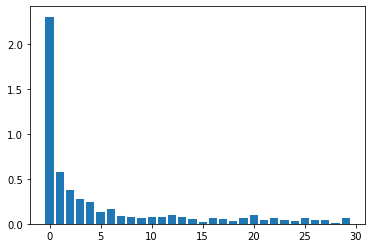

In [ ]:
x = np.arange(30)
y = []
for i in loss_arr:
    y.append(i)
plt.bar(x,y)

<BarContainer object of 10 artists>

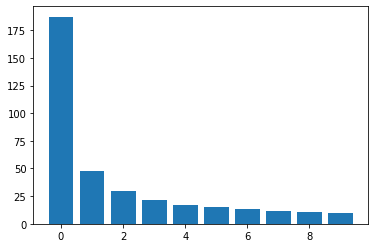

In [ ]:
x = np.arange(len(loss_arr2))
y = []
for i in loss_arr2:
    y.append(i.item()) # loss_arr2에 텐서가 들어있어서 그래프 안그려짐
plt.bar(x,y)

In [7]:
correct = 0
total = 0
with torch.no_grad():
    for i, data in enumerate(test_loader):
        image, label = data[0],data[1]
        image = image.to(device)
        label = label.to(device)
        
        output = model(image)
        _ , idx = torch.max(output,1)
        # torch.max는 values, indices 값을 반환
        # dim은 input의 형태에서 dim에 해당하는 숫자뺴고의 형태로 / input이 r*c 형태에서 dim이 1이면 행을 기준으로 최대값
        
        
        total += len(label) # label.size(0)도 가능
        correct += (idx == label).sum().item() # item 대신 float 가능
        
    print(f'acc: {correct/total*100}')


acc: 98.83814102564102


## VGGNET

- 깊이가 모델의 성능에 미치는 영향  
- 단순한 연산만을 가지고 모델 구성

#### 16 layers

In [13]:
from torch.nn.modules.linear import Linear
def con_2_block(in_dim, out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    return model

def con_3_block(in_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    return model

def fc_layer(in_dim, out_dim):
    model = nn.Sequential(
        nn.Linear(in_dim,100),
        nn.ReLU(True), # inplace = True를 하면 input한것을 수정 / memory usage 좋아지지만 input 지워짐
        nn.Linear(100,20),
        nn.ReLU(True),
        nn.Linear(20,out_dim)
    )
    return model

class VGG(nn.Module):
    def __init__(self, base_dim,in_dim, n_classes):
        super().__init__()
        self.feature = nn.Sequential(
            con_2_block(in_dim,base_dim),
            con_2_block(base_dim,2*base_dim),
            con_3_block(2*base_dim,4*base_dim),
            con_3_block(4*base_dim,8*base_dim),
            con_3_block(8*base_dim,8*base_dim),
        )
        self.fc_layer = fc_layer(8*base_dim*7*7, n_classes)
        # 처음이 224*224 인데 maxpooling 5번 이므로 224/32 * 224/32

    def forward(self, x):
        x = self.feature(x)
        x = x.view(x.size(0),-1)
        x = self.fc_layer(x)
        return x


In [ ]:
vgg = VGG(64,3,10)
vgg

VGG(
  (feature): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padd

In [ ]:
mnist_train[0][0].size()

torch.Size([1, 28, 28])

In [ ]:
class maxpool_size(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature = nn.Sequential(
            nn.MaxPool2d(2,2),
            nn.MaxPool2d(2,2),
            nn.MaxPool2d(2,2),
            nn.MaxPool2d(2,2),
            nn.MaxPool2d(2,2)
        )

    def forward(self,x):
        x = self.feature(x)

        return x.size()

In [ ]:
maxpool = maxpool_size()
maxpool(mnist_train[0][0])
# mnist는 28*28 이기때문에 maxpool을 5번하면 너무 작아져서 할 수 없다.

RuntimeError: ignored

In [ ]:
arr = []
for _ in range(5):
    arr += [nn.MaxPool2d(2,2,ceil_mode = True)]
pool = nn.Sequential(*arr)
pool(mnist_train[0][0]).size()
# ceil_mode = True 로 한다면 가능하긴 하다...

torch.Size([1, 1, 1])

In [14]:
vgg = VGG(64,1,10)
arr2=[]
for i in vgg.feature:
    for j in i:
        if type(j) == torch.nn.modules.pooling.MaxPool2d:
            arr2 += [nn.MaxPool2d(2,2,ceil_mode= True)]
        else:
            arr2 += [j]

'''
for i in vgg.modules():
    if isinstance(i , nn.MaxPool2d):
대신써도 가능할듯...
'''

'\nfor i in vgg.modules():\n    if isinstance(i , nn.MaxPool2d):\n대신써도 가능할듯...\n'

In [15]:
class VGG2(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature = nn.Sequential(*arr2)
        self.fc_layer = fc_layer(512,10)

    def forward(self, x):
        x = self.feature(x)
        x = x.view(x.size(0),-1)
        x = self.fc_layer(x)
        return x

vgg2 = VGG2()
vgg2

VGG2(
  (feature): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), paddin

In [16]:
model = vgg2.to(device)
loss_fun = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr)

In [17]:
loss_arr=[]
loss_arr2=[]
loss_sum=0
for epoch in range(epochs):
    for i, data in enumerate(train_loader):
        image, label = data[0],data[1]
        image = image.to(device)
        label = label.to(device)
        
        optimizer.zero_grad()
        output = model(image)
        loss = loss_fun(output,label) # loss function 의 이름을 loss로 할 경우 한번하고 오류발생
        loss.backward()
        optimizer.step()
        loss_sum += loss
   
        if i % 100 == 0:
            print(loss)
            loss_arr.append(loss.detach().cpu().numpy().item())
            # detach - gradient 없애서 복사 / detach한 값 변경시 원래값도 같이 변한다
            # cpu - gpu 메모리에서 cpu로 복사 
            # numpy - tensor를 numpy로 변환
            
    loss_arr2.append(loss_sum)
    loss_sum = 0

tensor(2.3039, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8107, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1884, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0215, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5678, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2403, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2291, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1801, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1912, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0846, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0597, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1568, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0357, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0781, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0273, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0367, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0061, device='cuda:0', grad_fn=

In [18]:
correct = 0
total = 0
with torch.no_grad():
    for i, data in enumerate(test_loader):
        image, label = data[0],data[1]
        image = image.to(device)
        label = label.to(device)
        
        output = model(image)
        _ , idx = torch.max(output,1)
        # torch.max는 values, indices 값을 반환
        # dim은 input의 형태에서 dim에 해당하는 숫자뺴고의 형태로 / input이 r*c 형태에서 dim이 1이면 행을 기준으로 최대값
        
        
        total += len(label) # label.size(0)도 가능
        correct += (idx == label).sum().item() # item 대신 float 가능
        
    print(f'acc: {correct/total*100}')


acc: 98.79807692307693
